In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, zipfile, shutil
from sklearn.model_selection import train_test_split

DATASET_ZIP_PATH = "/content/drive/MyDrive/BetelLeafDataset/SeverityDataset.zip"
DATASET_PATH = "/content/SeverityDataset"
TEST_PATH = "/content/drive/MyDrive/BetelLeafDataset/SeverityDataset_test"

# 1. Unzip dataset if needed
if not os.path.exists(DATASET_PATH):
    with zipfile.ZipFile(DATASET_ZIP_PATH, "r") as z:
        z.extractall("/content")
    print("✅ Dataset unzipped")

# 2. Create test folder in Drive
if os.path.exists(TEST_PATH):
    shutil.rmtree(TEST_PATH)

os.makedirs(TEST_PATH, exist_ok=True)

for cls in ["early", "moderate", "severe"]:
    src_cls = os.path.join(DATASET_PATH, cls)
    dst_cls = os.path.join(TEST_PATH, cls)
    os.makedirs(dst_cls, exist_ok=True)

    images = [f for f in os.listdir(src_cls)
              if f.lower().endswith(('.jpg','.jpeg','.png'))]

    _, test_imgs = train_test_split(images, test_size=0.15, random_state=42)

    for img in test_imgs:
        shutil.copy(
            os.path.join(src_cls, img),
            os.path.join(dst_cls, img)
        )

print("✅ Test dataset created permanently at:")
print(TEST_PATH)


Mounted at /content/drive
✅ Dataset unzipped
✅ Test dataset created permanently at:
/content/drive/MyDrive/BetelLeafDataset/SeverityDataset_test


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset structure verified
Found 1997 files belonging to 3 classes.
Using 1598 files for training.
Found 1997 files belonging to 3 classes.
Using 399 files for validation.
Found 301 files belonging to 3 classes.
Classes: ['early', 'moderate', 'severe']
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "ResNet50_Severity"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 224, 224,  │          0 │ rescaling[0][0]   │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 224, 224,  │          0 │ sequential[0][0]  │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ multiply[0][0]    │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ multiply[0][0]    │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │        771 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 399ms/step - accuracy: 0.3692 - loss: 1.3749 - val_accuracy: 0.5388 - val_loss: 0.9465
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 349ms/step - accuracy: 0.5479 - loss: 0.9236 - val_accuracy: 0.6266 - val_loss: 0.8288
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.5545 - loss: 0.8726 - val_accuracy: 0.6366 - val_loss: 0.8060
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 348ms/step - accuracy: 0.5700 - loss: 0.8394 - val_accuracy: 0.6642 - val_loss: 0.7732
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 353ms/step - accuracy: 0.6379 - loss: 0.7657 - val_accuracy: 0.6617 - val_loss: 0.7893
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.6393 - loss: 0.7632 - val_accuracy: 0.6617 - val_loss: 0.7705
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 346ms/step - accuracy: 0.6630 - loss: 0.7581 - val_accuracy: 0.6992 - val_loss: 0.7302
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 347ms/step - accuracy: 0.6615 - loss: 0.7383 - val_accu

✅ Test Accuracy: 0.920265780730897
              precision    recall  f1-score   support

       early       0.93      0.93      0.93        91
    moderate       0.86      0.94      0.90       114
      severe       0.99      0.89      0.93        96

    accuracy                           0.92       301
   macro avg       0.93      0.92      0.92       301
weighted avg       0.92      0.92      0.92       301

Confusion Matrix:
 [[ 85   6   0]
 [  6 107   1]
 [  0  11  85]]
✅ Model saved at: /content/drive/MyDrive/SeverityModels/resnet50/resnet50_final.keras


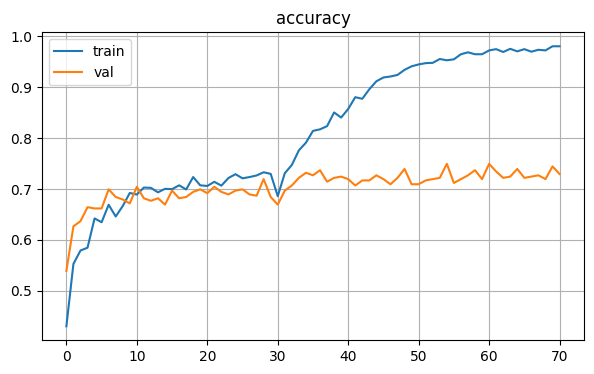

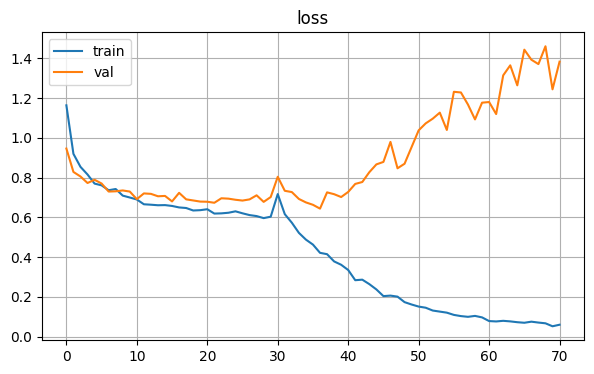

In [ ]:
# ============================================================
# ResNet50_Severity_Training.ipynb (FINAL – FIXED VERSION)
# ============================================================

from google.colab import drive
drive.mount('/content/drive')

# ------------------------------------------------------------
# 1. Paths
# ------------------------------------------------------------
DATASET_ZIP_PATH = "/content/drive/MyDrive/BetelLeafDataset/SeverityDataset.zip"
DATASET_PATH = "/content/SeverityDataset"
TEST_PATH = "/content/drive/MyDrive/BetelLeafDataset/SeverityDataset_test"
SAVE_MODELS_DIR = "/content/drive/MyDrive/SeverityModels/resnet50"

import os, zipfile, shutil
os.makedirs(SAVE_MODELS_DIR, exist_ok=True)

# ------------------------------------------------------------
# 2. Unzip dataset ONCE (correct location)
# ------------------------------------------------------------
if not os.path.exists(DATASET_PATH):
    print("🔄 Unzipping dataset...")
    with zipfile.ZipFile(DATASET_ZIP_PATH, 'r') as z:
        z.extractall("/content")
    print("✅ Dataset unzipped")

# Verify structure
required = ["early", "moderate", "severe"]
for r in required:
    if not os.path.isdir(os.path.join(DATASET_PATH, r)):
        raise FileNotFoundError(f"❌ Missing class folder: {r}")

print("✅ Dataset structure verified")

# ------------------------------------------------------------
# 3. Imports & Parameters
# ------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

HEAD_EPOCHS = 30
FT_EPOCHS = 40

LR_HEAD = 1e-4
LR_FT = 2e-5

# ------------------------------------------------------------
# 4. Datasets
# ------------------------------------------------------------
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_PATH,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    label_mode="int"
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# ------------------------------------------------------------
# 5. Augmentation & Preprocessing
# ------------------------------------------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.12),
    layers.RandomZoom(0.12),
    layers.RandomContrast(0.08)
])

rescale = layers.Rescaling(1./255)

# ------------------------------------------------------------
# 6. Build ResNet50 Model
# ------------------------------------------------------------
base = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base.trainable = False

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = rescale(inputs)
x = data_augmentation(x)
x = tf.keras.applications.resnet.preprocess_input(x * 255.0)

x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = models.Model(inputs, outputs, name="ResNet50_Severity")
model.summary()

# ------------------------------------------------------------
# 7. Train Head
# ------------------------------------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(LR_HEAD),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_head = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=HEAD_EPOCHS
)

# ------------------------------------------------------------
# 8. Fine-Tuning
# ------------------------------------------------------------
base.trainable = True
for layer in base.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(LR_FT),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=HEAD_EPOCHS + FT_EPOCHS,
    initial_epoch=history_head.epoch[-1]
)

# ------------------------------------------------------------
# 9. Evaluation
# ------------------------------------------------------------
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

print("✅ Test Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ------------------------------------------------------------
# 10. Save Model (Keras format)
# ------------------------------------------------------------
final_path = os.path.join(SAVE_MODELS_DIR, "resnet50_final.keras")
model.save(os.path.join(SAVE_MODELS_DIR, "ResNet50_Severity.h5"))
os.makedirs(os.path.dirname(final_path), exist_ok=True) # Ensure directory exists right before saving
model.save(final_path)
print("✅ Model saved at:", final_path)

# ------------------------------------------------------------
# 11. Training Curves
# ------------------------------------------------------------
import matplotlib.pyplot as plt

def plot_history(h1, h2, metric):
    train = h1.history[metric] + h2.history.get(metric, [])
    val = h1.history["val_" + metric] + h2.history.get("val_" + metric, [])
    plt.figure(figsize=(7,4))
    plt.plot(train, label="train")
    plt.plot(val, label="val")
    plt.title(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history_head, history_ft, "accuracy")
plot_history(history_head, history_ft, "loss")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import tensorflow as tf
import os

SAVE_MODELS_DIR = "/content/drive/MyDrive/SeverityModels/resnet50"
keras_model_path = os.path.join(SAVE_MODELS_DIR, "resnet50_final.keras")
h5_model_path = os.path.join(SAVE_MODELS_DIR, "ResNet50_Severity.h5")

model = None

# Try loading the .keras model first (recommended format)
if os.path.exists(keras_model_path):
    print(f"Attempting to load .keras model from: {keras_model_path}")
    try:
        model = tf.keras.models.load_model(keras_model_path)
        print("✅ .keras model loaded successfully.")
    except Exception as e:
        print(f"❌ Failed to load .keras model: {e}")
        model = None
else:
    print(f"⚠️ .keras model not found at: {keras_model_path}")

# If .keras failed or not found, try the .h5 model
if model is None:
    if os.path.exists(h5_model_path):
        print(f"Attempting to load .h5 model from: {h5_model_path}")
        try:
            model = tf.keras.models.load_model(h5_model_path)
            print("✅ .h5 model loaded successfully.")
        except Exception as e:
            print(f"❌ Failed to load .h5 model: {e}")
            model = None
    else:
        print(f"⚠️ .h5 model not found at: {h5_model_path}")

if model is None:
    print("❌ Both .keras and .h5 models failed to load or were not found.")
    print("Please ensure the model training and saving cell (gakUHzCvtCQo) was executed successfully and the files exist in Google Drive.")
else:
    # Convert
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

    tflite_model = converter.convert()

    # Save
    with open("resnet50_severity.tflite", "wb") as f:
        f.write(tflite_model)

    print("✅ TFLite model saved")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Attempting to load .keras model from: /content/drive/MyDrive/SeverityModels/resnet50/resnet50_final.keras


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 66 variables whereas the saved optimizer has 130 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ .keras model loaded successfully.
Saved artifact at '/tmp/tmpd_uarlk8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132313985363472: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  132314254918096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132314254933840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132314254931728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132314254930768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132314254930960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132314254931536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132314254931152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132314254933456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132314254933648: TensorSpec(shape=(), 

In [ ]:
import shutil

shutil.move(
    "/content/resnet50_severity.tflite",
    "/content/drive/MyDrive/SeverityModels/resnet50/resnet50_severity.tflite"
)

print("✅ TFLite model moved to Google Drive")


✅ TFLite model moved to Google Drive
